                                          בסייד

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Correlation/water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


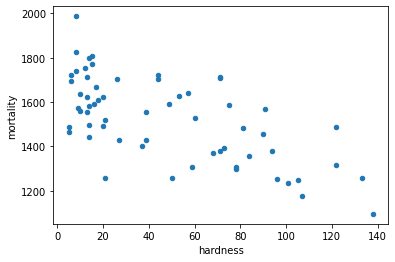

In [ ]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Зависимость средняя

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=613)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2128943980675445

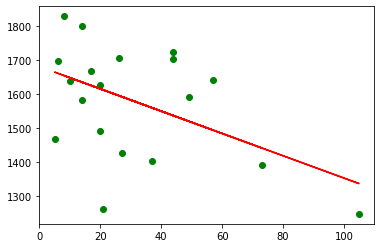

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, c='g')
plt.plot(X_test, y_pred, c='r')

коэффициент детерминации очень низкий ,чтобы по такой модели делать прогнозы

In [ ]:
# остатки
y_test - y_pred

27   -156.911656
40     35.547798
2    -197.727703
19   -351.319680
52    146.598373
8     -10.350196
44     71.394361
20    187.016854
55     10.404819
10    -48.993603
15   -123.595181
3     165.751810
29    174.098801
0     -89.177556
1      43.578314
32    -53.248190
31    166.016854
35   -164.666671
30    109.057827
Name: mortality, dtype: float64

(array([1., 0., 1., 2., 2., 2., 2., 3., 1., 5.]),
 array([-351.31967991, -297.48602653, -243.65237315, -189.81871977,
        -135.98506639,  -82.15141301,  -28.31775963,   25.51589375,
          79.34954713,  133.18320051,  187.0168539 ]),
 <a list of 10 Patch objects>)

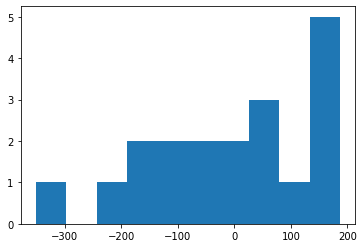

In [ ]:
plt.hist(y_test - y_pred)

Задание 2

Text(0.5, 1.0, 'Зависимость смертности от жесткости воды для Южных регионов')

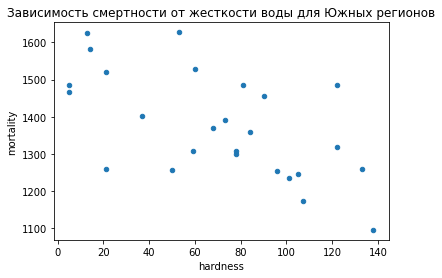

In [ ]:
df[df['location'] == 'South'].plot(kind='scatter', x='hardness', y='mortality')
plt.title('Зависимость смертности от жесткости воды для Южных регионов')

In [ ]:
# коэф. корреляции Пирсона
df[df['location'] == 'South'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# коэф. корреляции Спирмана
df[df['location'] == 'South'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


Зависимость средняя , но по графику можно сделать вывод о том что линейная зависимость отсутствует 

In [ ]:
X1 = df[df['location'] == 'South'][['hardness']]
y1 = df[df['location'] == 'South'][['mortality']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=18)

In [ ]:
model_South = LinearRegression()
model_South.fit(X_train1, y_train1)
model_South.score(X_test1, y_test1)

0.39101434458601747

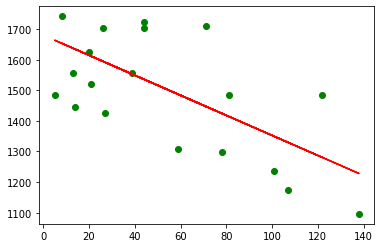

In [ ]:
y_pred1 = model.predict(X_test1)
plt.scatter(X_test1, y_test1, c='g')
plt.plot(X_test1, y_pred1, c='r')

(array([5., 3., 2., 0., 2., 1., 2., 1., 2., 1.]),
 array([-190.2481902 , -145.07783182,  -99.90747344,  -54.73711506,
          -9.56675669,   35.60360169,   80.77396007,  125.94431845,
         171.11467682,  216.2850352 ,  261.45539358]),
 <a list of 10 Patch objects>)

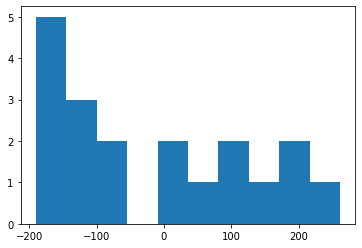

In [ ]:
# Остатки Юг
plt.hist(y_test1 - y_pred1)

Очень низкий коэффициент детерминации. Вряд ли по такой модели можно делать прогнозы

Text(0.5, 1.0, 'Зависимость смертности от жесткости воды для Северных регионов')

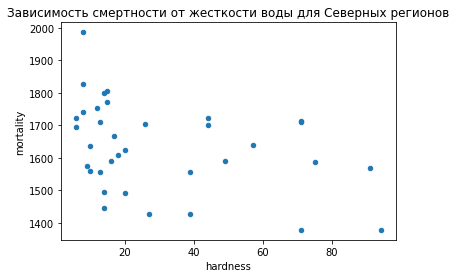

In [ ]:
df[df['location'] == 'North'].plot(kind='scatter', x='hardness', y='mortality')
plt.title('Зависимость смертности от жесткости воды для Северных регионов')

In [ ]:
# коэф. корреляции Пирсона
df[df['location'] == 'North'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# коэф. корреляции Спирмана
df[df['location'] == 'North'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
X2 = df[df['location'] == 'North'][['hardness']]
y2 = df[df['location'] == 'North'][['mortality']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
model_North = LinearRegression()
model_North.fit(X_train2, y_train2)
model_North.score(X_test2, y_test2)

0.23374928387625848

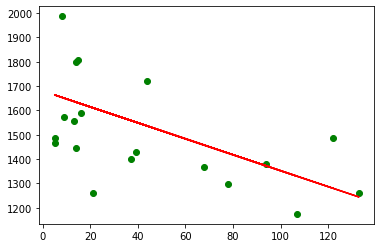

In [ ]:
y_pred2 = model.predict(X_test2)
plt.scatter(X_test2, y_test2, c='g')
plt.plot(X_test2, y_pred2, c='r')

(array([1., 0., 5., 4., 2., 2., 0., 3., 1., 1.]),
 array([-351.31967991, -282.87783182, -214.43598373, -145.99413564,
         -77.55228755,   -9.11043946,   59.33140863,  127.77325672,
         196.21510481,  264.6569529 ,  333.09880098]),
 <a list of 10 Patch objects>)

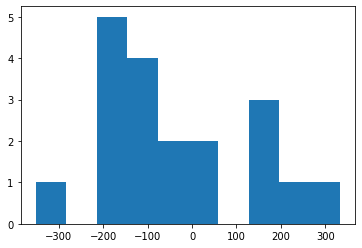

In [ ]:
# Остатки Север
plt.hist(y_test2 - y_pred2)

Очень низкий коэффициент детерминации. Вряд ли по такой модели можно делать прогнозы